# Projet : Forage de données IFT870

**Groupe 4**

|  Prénom  |    Nom   |    CIP   |  Matricule |
|----------|----------|----------|------------|
| Honorine | Chantre  | CHAH2807 | 21 117 462 |
| Manon    | Cottart  | COTM3313 | 21 126 210 |
| Lucas    | Gonthier | GONL3002 | 21 155 376 |
| Étienne  | Penelle  | PENE2002 | 16 114 642 |



# Analyse et description des images

Ce notebook recense des méthodes, démarches entreprises et graphiques liés à l'analyse des données-image brutes référant aux parties Description des données de la Partie 1 et Analyse des données de la Partie 2 du rapport. On utilisera dans ce notebook à la fois les images en .png et les images en .mat. 

Les différentes analyses sont les suivantes : 
- Mise en évidence de la structure des images en .png et en .mat
- Affichage de la distribution de chaque classe
- Affichage de certaines caractéristiques des pixels des images (moyenne, variance, etc.)
    - Pour chaque image
    - Pour chaque tumeur de chaque image
- Dsitribution des couleurs 
    - Pour chaque canal de chaque image
    - Pour chaque tumeur de chaque image
- Pourcentage de la surface de la tumeur par rapport à toute l'image
    - Pour toutes les données
    - Pour une classe
- Coordonnées moyenne de la tumeur pour toutes les données

### Installation des dépendances

In [1]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


### Imports

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
from pymatreader import read_mat
import pandas as pd
import cv2

### Obtention des données
#### Format png
Il faut aller chercher les images de couleur à l'endroit suivant :
https://www.kaggle.com/denizkavi1/brain-tumor

Ensuite, il faut décompresser le fichier et placer le contenu dans
```dataset/png```. Ce dossier doit contenir 3 dossiers numérotés de 1 à 3.

#### Format mat
Il faut aller chercher les données d'images à l'endroit suivant :
https://figshare.com/articles/dataset/brain_tumor_dataset/1512427/5
Ensuite, il faut décompresser tous les fichiers et tout placer le contenu dans
```dataset/mat```. Ce dernier dossier doit contenir 3064 images numérotées de 1 à 3064.

### Importation de données

Cette partie permet d'importer dans le notebook les données à la fois en .png et en .mat sous forme, respectivement, d'un tableau et d'un dictionnaire pour ainsi effectuer les analyses correspondantes.

In [2]:
nb_images = 3064
class_names = ['Meningioma', 'Glioma', 'Pituitary']

In [3]:
def load_data(type, nb_images=3064):
    """
    This function allows to load data into png or mat format.
    @params: type : 
    @params: nb_images : the number of images. 3064 by default.
    @return: if the type is mat, it returns a dictionnary indexed with the number of the class. if the type is png
             it returns a list containing all png images, data[i] contains images of the class i.
    
    """
    data = {}
    if type == 'mat':
        for i in range(1, nb_images+1):
            dir = "dataset/mat/" + str(i) + ".mat"
            data[i] = read_mat(dir)
        return data
    
    if type == 'png':
        data = [[], [], []]  
        for i in range(len(class_names)):
            dir = "dataset/png/" + str(i+1)
            for path in os.listdir(dir):
                data[i].append(io.imread(dir + "/" + path))
        return data


mat_data = load_data(type='mat')
png_data = load_data(type='png')


### Séparation des données .mat en 3 listes selon leur classe

In [4]:
def separate_mat_data(mat_data):
    list_class1 = []
    list_class2 = []
    list_class3 = []
    
    for i in range(1, len(mat_data)+1):
            
        if mat_data[i]['cjdata']['label'] == 1.0:
            list_class1.append(mat_data[i])
                
        if mat_data[i]['cjdata']['label'] == 2.0:
            list_class2.append(mat_data[i])
                
        if mat_data[i]['cjdata']['label'] == 3.0:
            list_class3.append(mat_data[i])
                
    return list_class1, list_class2, list_class3

list_class1, list_class2, list_class3 = separate_mat_data(mat_data)

### Mise en évidence de la structure des images au format .png

In [5]:
print("Affichage de la 61ième image de la classe 2 : \n")
print(png_data[2][60])
print("\n Les images sont de taille : " + str(len(png_data[2][60])) + " x " + str(len(png_data[2][60][0])))

Affichage de la 61ième image de la classe 2 : 

[[[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 ...

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   2  85 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]

 [[ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]
  ...
  [ 68   1  84 255]
  [ 68   1  84 255]
  [ 68   1  84 255]]]

 Les images sont de taille : 512 x 512


*png_data* est de taille 3 x nombre d'images par classe x 512 x 512 x 4. Dans cette structure, on dispose des valeurs des pixels pour chaque canal R, G et B.

### Mise en évidence de la structure des images au format .mat

In [6]:
print("Affichade la 405ème image : \n")
print(mat_data[405])

Affichade la 405ème image : 

{'cjdata': {'tumorMask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'label': 1.0, 'PID': '97607', 'image': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'tumorBorder': array([213.02649183, 110.25055279, 202.74889793, 113.98785967,
       197.14293762, 119.12665662, 196.2086109 , 124.73261693,
       192.47130402, 131.74006732, 189.66832387, 137.81319099,
       187.79967043, 144.82064138, 188.73399715, 156.032562  ,
       192.00414067, 162.57284903, 198.07726434, 167.71164598,
       201.34740785, 170.9817895 , 203.68322465, 177.05491317,
       206.4862048 , 181.2593834 , 208.35485824, 183.12803684,
       217.6

*mat_data* est de taille 3064. Ainsi dans la précédente cellule, on accède à la 405ème image (les indices de mat_data commencent à 1). 
Une image au format .mat contient : 
- un tableau tumorBordel contenant le contour discrétisé des tumeurs sous la forme [x1, y1, x2, y2, …], 
- un tableau image contenant les pixels non normalisés entre 0 et 255 de l'image sur 1 seul canal,
- un label désignant la classe d'appartenance,
- un tableau binaire tumorMask de même dimension que les images au format png (512 x 512), qui contient 1 aux
endroits où se trouve la tumeur.

### Affichage de la distribution de chaque classe

Cette partie permet de voir la distribution des données pour chaque classe.

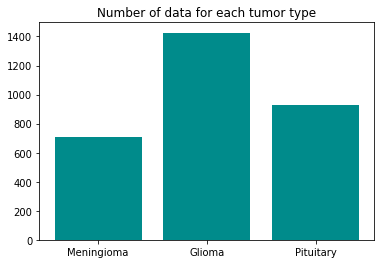

In [7]:
nb_per_class = [len(png_data[0]), len(png_data[1]), len(png_data[2])]
plt.bar(class_names, height=nb_per_class, color='darkcyan')
plt.title('Number of data for each tumor type')
plt.show()

On remarque que les classes sont très déséquilibrées.

### Suppression du canal alpha dans les png

Les images en png contiennent non pas 3 canaux mais 4. Le 4ème désigne le canal alpha qui donne une information sur l'opacité ou la transparence de chaque pixel. 

In [8]:
print(png_data[0])

[array([[[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       ...,

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 6

Les valeurs du canal alpha ont l'air de toutes valoir 255, au moins pour la classe des tumeurs de type Meningiome. Vérifions cela pour toutes les classes.

In [9]:
mean_alpha_channel = []
for i in range(len(png_data)):
    for j in range(len(png_data[i])):
        mean_alpha_channel.append(np.mean(png_data[i][j], axis = (0,1))[3])

mean_alpha_channel_arr = np.array(mean_alpha_channel)
all_equal = 255 * np.ones(nb_images)
if (mean_alpha_channel_arr == all_equal).all():
    print('Les valeurs du canal alpha pour toutes les images sont toutes égales à 255 !')
else:
    print('Les valeurs du canal alpha pour toutes les images ne sont pas toutes égales à 255 !')

Les valeurs du canal alpha pour toutes les images sont toutes égales à 255 !


Nous pouvons remarquer que toutes les valeurs sont égales à 255, ainsi nous décidons de supprimer cette colonne pour chaque image pour qu'elle n'ait pas d'influence sur les caractéristiques mesurées plus bas.

In [10]:
for i in range(len(png_data)):
    for j in range(len(png_data[0])):
        png_data[i][j] = np.delete(png_data[i][j], -1, axis = 2)

### Récupération des valeurs de pixels des ROI

Cette partie permet de récupérer les valeurs des pixels des ROI pour chaque image à l'aide du masque fournit dans les images au format .mat pour en faire des analyses.

In [11]:
roi_pixel_values = []

for i in range(1, nb_images + 1):
    product_mask_image = mat_data[i]['cjdata']['tumorMask'] * mat_data[i]['cjdata']['image']
    product_mask_image_nonzero = product_mask_image.nonzero()
    roi_pixel_values_img = []
    for j in range(len(product_mask_image_nonzero[0])):
        roi_pixel_values_img.append(product_mask_image[product_mask_image_nonzero[0][j]][product_mask_image_nonzero[1][j]])
    maxpi = np.max(roi_pixel_values_img)
    minpi = np.min(roi_pixel_values_img)
    roi_pixel_values_img_norm = (((roi_pixel_values_img - minpi) / (maxpi - minpi)) * 255).astype(np.uint8)
    roi_pixel_values.append(np.array(roi_pixel_values_img_norm))
    

### Génération des images en noir et blanc

Cette partie permet de transformer les images png en noir et blanc pour pouvoir calculer le contraste de chaque image.

In [12]:
png_data_grey = [ [], [], [] ]
for i in range(len(png_data)):
    for j in range(len(png_data[i])):
        image_grey = cv2.cvtColor(png_data[i][j], cv2.COLOR_BGR2GRAY)
        png_data_grey[i].append(image_grey)

### Affichage de caractéristiques

#### Affichage des caractéristiques pour chaque image au format png

Nous affichons les moyennes totales et pour chaque canal, les variances totales et pour chaque canal ainsi que le contraste pour chaque image pour détecter des tendances selon les classes.

In [13]:
features_img = pd.DataFrame(columns=['Id','Class','Mean_R','Mean_G','Mean_B','Mean','Var_R','Var_G','Var_B','Var','Contrast'])
id_image = 0
for i in range(len(png_data)):
    for j in range(len(png_data[i])):
        mean_tot = np.mean(png_data[i][j])
        var_tot = np.var(png_data[i][j])
        mean_by_chan = np.mean(png_data[i][j], axis = (0,1))
        var_by_chan = np.var(png_data[i][j], axis = (0,1))
        contrast_img = png_data_grey[i][j].std()
        features_img = features_img.append({'Id' : id_image, 'Class' : i, 'Mean_R' : mean_by_chan[0], 'Mean_G' : mean_by_chan[1], 'Mean_B' : mean_by_chan[2], 'Mean' : mean_tot,
                                   'Var_R' : var_by_chan[0], 'Var_G' : var_by_chan[1], 'Var_B' : var_by_chan[2], 'Var' : var_tot, 'Contrast' : contrast_img}, ignore_index = True)
        id_image += 1

features_img

,Id,Class,Mean_R,Mean_G,Mean_B,Mean,Var_R,Var_G,Var_B,Var,Contrast
0,0.0,0.0,62.503937,47.530018,113.650990,74.561648,98.959343,2010.637466,583.913550,1699.194803,32.169609
1,1.0,0.0,60.984772,49.663212,112.304661,74.317548,129.094792,2546.092121,626.607312,1843.471393,35.446762
2,2.0,0.0,60.949844,50.708069,112.040287,74.566067,170.293238,2712.634587,639.523771,1893.791452,36.268973
3,3.0,0.0,61.791832,48.241348,109.547665,73.193615,155.090036,2942.800783,649.143793,1940.422603,37.449713
4,4.0,0.0,61.222656,48.697399,111.795677,73.905244,125.854385,2534.092404,625.144493,1839.019895,35.379750
...,...,...,...,...,...,...,...,...,...,...,...
3059,3059.0,2.0,57.414688,77.870457,122.987656,128.318200,299.253052,2905.205016,548.788346,6850.555593,35.615961
3060,3060.0,2.0,61.430229,64.179337,124.215580,126.206286,130.194770,1678.879353,421.983017,6716.530203,28.194247
3061,3061.0,2.0,62.264259,62.437584,123.647751,125.837399,140.351683,1634.541697,422.827794,6736.643467,27.808481
3062,3062.0,2.0,61.811695,57.945580,121.544212,124.075372,98.619345,1638.288626,442.946776,6894.358662,28.540685


Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les caractéristiques des différents canaux.

<Figure size 432x288 with 0 Axes>

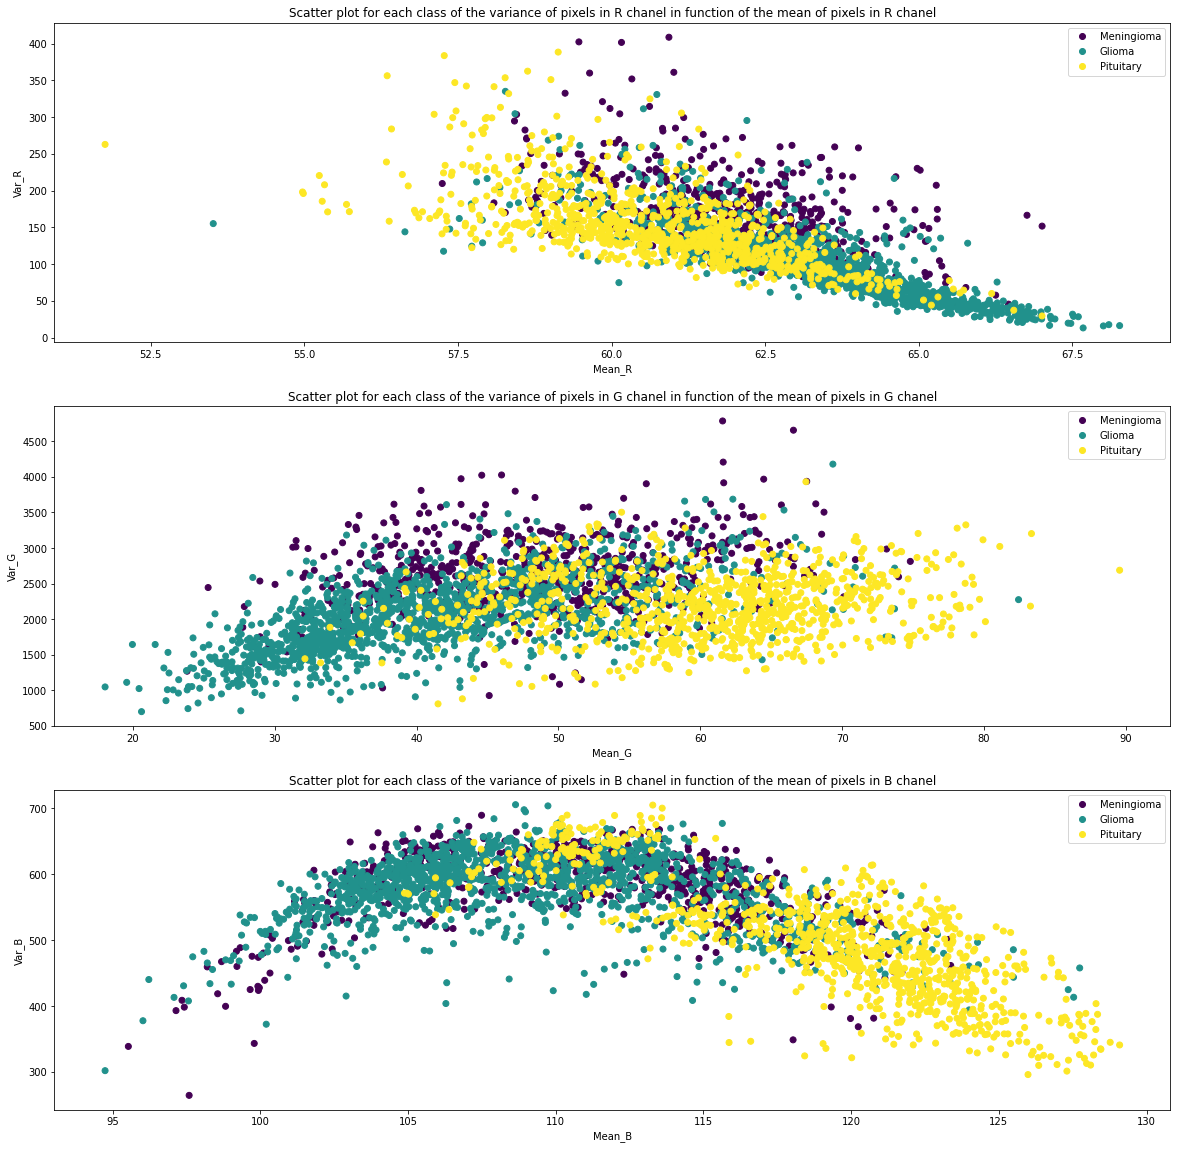

In [14]:
fig = plt.figure()    
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(20,20))

scatter1 = axs[0].scatter(features_img['Mean_R'], features_img['Var_R'], c = features_img['Class'])
axs[0].set_xlabel('Mean_R')
axs[0].set_ylabel('Var_R')
axs[0].set_title('Scatter plot for each class of the variance of pixels in R chanel in function of the mean of pixels in R chanel')
axs[0].legend(handles=scatter1.legend_elements()[0], labels=class_names)

scatter2 = axs[1].scatter(features_img['Mean_G'], features_img['Var_G'], c = features_img['Class'])
axs[1].set_xlabel('Mean_G')
axs[1].set_ylabel('Var_G')
axs[1].set_title('Scatter plot for each class of the variance of pixels in G chanel in function of the mean of pixels in G chanel')
axs[1].legend(handles=scatter2.legend_elements()[0], labels=class_names)

scatter3 = axs[2].scatter(features_img['Mean_B'], features_img['Var_B'], c = features_img['Class'])
axs[2].set_xlabel('Mean_B')
axs[2].set_ylabel('Var_B')
axs[2].set_title('Scatter plot for each class of the variance of pixels in B chanel in function of the mean of pixels in B chanel')
axs[2].legend(handles=scatter3.legend_elements()[0], labels=class_names)

#### Affichage des caractéristiques pour chaque ROI

Nous affichons les moyennes et variances totales pour chaque roi de chaque image pour détecter des tendances selon les classes à l'aide de la récupération des valeurs des pixels des ROI faite plus haut.

In [15]:
features_roi = pd.DataFrame(columns=['Id','Class','Mean','Var'])
id_image = 0
class_nb = 0
for i in range(len(roi_pixel_values)):
    if i < 708:
        class_nb = 0
    elif 708 <= i < 1426:
        class_nb = 1
    else:
        class_nb = 2
    mean_tot = np.mean(roi_pixel_values[i])
    var_tot = np.var(roi_pixel_values[i])
    features_roi = features_roi.append({'Id' : id_image, 'Class' : class_nb, 'Mean' : mean_tot, 'Var' : var_tot}, ignore_index = True)
    id_image += 1

features_roi

,Id,Class,Mean,Var
0,0.0,0.0,143.010068,1107.502197
1,1.0,0.0,162.160718,1754.024575
2,2.0,0.0,180.590905,1283.000560
3,3.0,0.0,153.562999,1603.159373
4,4.0,0.0,125.271111,3996.271210
...,...,...,...,...
3059,3059.0,2.0,96.865692,2342.763617
3060,3060.0,2.0,87.312101,1138.038366
3061,3061.0,2.0,137.763072,3355.050074
3062,3062.0,2.0,170.665089,1435.506769


Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les 2 caractéristiques.

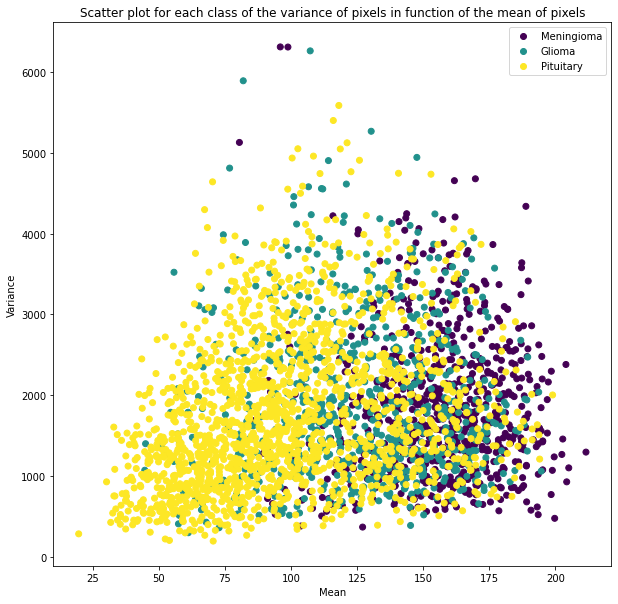

In [16]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(features_roi['Mean'], features_roi['Var'], c = features_roi['Class'])
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.title('Scatter plot for each class of the variance of pixels in function of the mean of pixels')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()

### Distribution des couleurs

Nous allons afficher la distribution des couleurs pour toutes les images et pour toutes les tumeurs afin de voir s'il existe des tendances selon les classes en termes de pixels.

#### Distribution de chaque canal pour toutes les données par classe

On affiche 3 graphiques différents : un par classe. Dans chacun des graphique on fait apparaître la distribution des couleurs pour chaque canal R, G et B.

In [21]:
def generate_histogram(imgs, do_print, hist_title):
    """
    @params: img: Batch of color images. We calculate the Normalized histogram of this batch.
    @params: do_print: if or not print the result histogram
    @return: will return the rgb histogram
    """
    red_hist = np.zeros([256])
    green_hist = np.zeros([256])
    blue_hist = np.zeros([256])
    
    for img in imgs:
        for x_pixel in range(img.shape[0]):
            for y_pixel in range(img.shape[1]):
                red_pixel_value = int(img[x_pixel, y_pixel, 0])
                green_pixel_value = int(img[x_pixel, y_pixel, 1])
                blue_pixel_value = int(img[x_pixel, y_pixel, 2])
                
                red_hist[red_pixel_value] += 1
                green_hist[green_pixel_value] += 1
                blue_hist[blue_pixel_value] += 1
            
    if do_print:
        print_histogram(red_hist, green_hist, blue_hist, title=hist_title)
    return red_hist, green_hist, blue_hist
  
def print_histogram(red_histrogram, green_histogram, blue_histogram, title):
    plt.figure()
    plt.title(title)
    plt.plot(red_histrogram, color='#ef476f')
    plt.plot(green_histogram, color='#34eb40')
    plt.plot(blue_histogram, color='#344feb')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    #plt.savefig('out/' + title)

KeyboardInterrupt: 

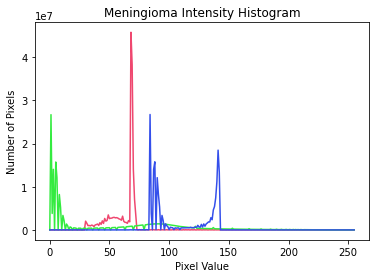

In [77]:
meningioma_red_hist, meningioma_green_hist, meningioma_blue_hist = generate_histogram(png_data[0], True, hist_title='Meningioma Intensity Histogram')
glioma_red_hist, glioma_green_hist, glioma_blue_hist = generate_histogram(png_data[1], True, hist_title='Glioma Intensity Histogram')
pituitary_red_hist, pituitary_green_hist, pituitary_blue_hist = generate_histogram(png_data[2], True, hist_title='Pituitary Intensity Histogram')

#### Distribution de la couleur sur la ROI (pour toutes les données et par classe)

On affiche 3 graphiques différents : un par classe. Les valeurs des pixels pour les ROI proviennent des images au format .mat dans lesquelles nous avons accès aux valeurs pour un seul canal. Dans chaque graphique, on fait alors apparaître la distribution des couleurs pour cet unique canal.

Text(0.5, 1.0, 'Distribution of pixels of Pituitary ROI')

<Figure size 432x288 with 0 Axes>

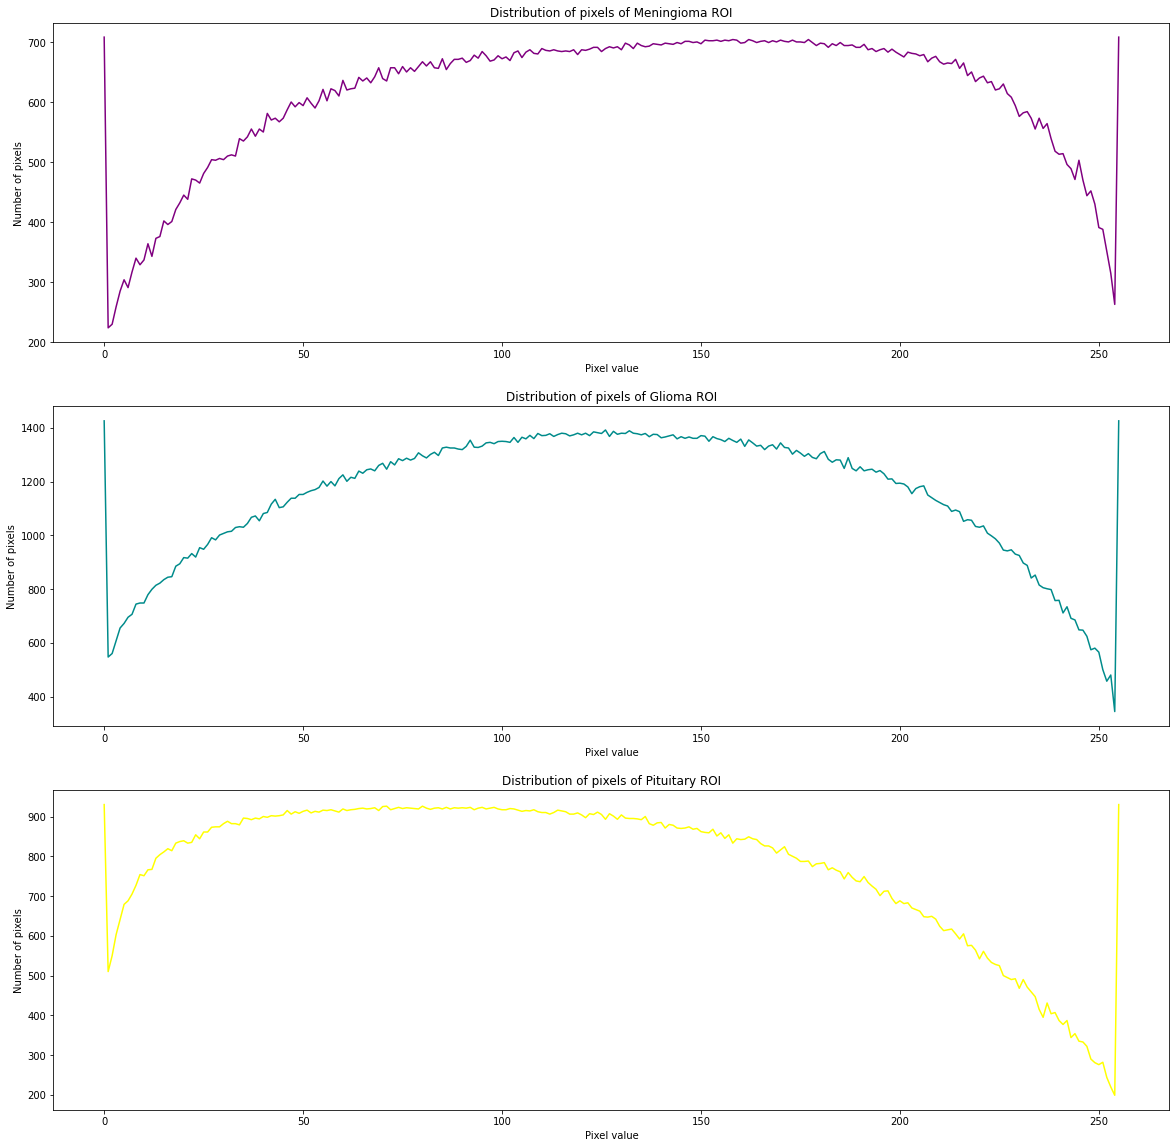

In [17]:
hist_meningioma = np.zeros([256])
hist_glioma = np.zeros([256])
hist_pituitary = np.zeros([256])
for i in range(len(roi_pixel_values)):
    if i < 708:
        hist_meningioma[roi_pixel_values[i]] += 1
    elif 708 <= i < 2134:
        hist_glioma[roi_pixel_values[i]] += 1
    else:
        hist_pituitary[roi_pixel_values[i]] += 1
        
fig = plt.figure()    
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize=(20,20))

axs[0].plot(hist_meningioma, color='purple')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Number of pixels')
axs[0].set_title('Distribution of pixels of Meningioma ROI')

axs[1].plot(hist_glioma, color='darkcyan')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Number of pixels')
axs[1].set_title('Distribution of pixels of Glioma ROI')

axs[2].plot(hist_pituitary, color='yellow')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Number of pixels')
axs[2].set_title('Distribution of pixels of Pituitary ROI')

### Pourcentage de la surface de la tumeur par rapport à toute l'image

Nous allons afficher le pourcentage de la surface de la tumeur par rapport à toute l'image pour chaque tumeur et pour toutes les images afin de voir s'il existe des tendances selon les classes en termes de pourcentage de la surface de la tumeur.

In [18]:
def calculate_percentage_tumor_per_class(list_class):
    
    size_image = 512 * 512
    list_percentage_per_class = []
    
    for i in range(len(list_class)):
        size_tumor_i = list_class[i]['cjdata']['tumorMask'].sum()
        percentage_tumor_i = size_tumor_i / size_image*100
        list_percentage_per_class.append(percentage_tumor_i)
    
    return list_percentage_per_class

percentage_class1 = calculate_percentage_tumor_per_class(list_class1)
percentage_class2 = calculate_percentage_tumor_per_class(list_class2)
percentage_class3 = calculate_percentage_tumor_per_class(list_class3)

percentage_all_data = percentage_class1 + percentage_class2 + percentage_class3

#### Moyenne du pourcentage de la surface de la tumeur

On affiche sur un graphique la moyennne du pourcentage de la surface de la tumeur pour chaque classe puis pour toutes les données.

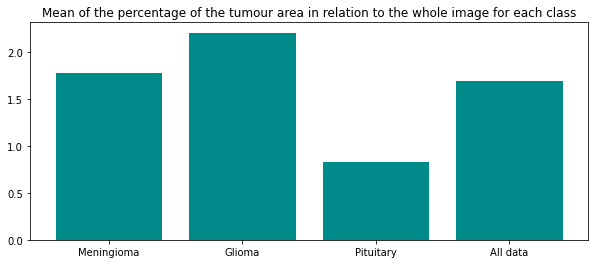

In [19]:
class_names_all = class_names + ['All data']

percentage_class1_mean = np.mean(percentage_class1)
percentage_class2_mean = np.mean(percentage_class2)
percentage_class3_mean = np.mean(percentage_class3)
percentage_all_data_mean = np.mean(percentage_all_data)

list_mean = []
list_mean.append(percentage_class1_mean)
list_mean.append(percentage_class2_mean)
list_mean.append(percentage_class3_mean)
list_mean.append(percentage_all_data_mean)

plt.figure(figsize=(10,4))  
plt.bar(class_names_all, height=list_mean, color = 'darkcyan')
plt.title('Mean of the percentage of the tumour area in relation to the whole image for each class')
plt.show()

#### Variance du pourcentage de la surface de la tumeur

On affiche sur un graphique la variance du pourcentage de la surface de la tumeur pour chaque classe puis pour toutes les données.

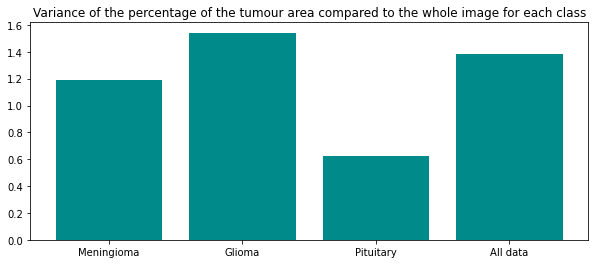

In [20]:
percentage_class1_std = np.std(percentage_class1)
percentage_class2_std = np.std(percentage_class2)
percentage_class3_std = np.std(percentage_class3)
percentage_all_data_std = np.std(percentage_all_data)

list_std = []
list_std.append(percentage_class1_std)
list_std.append(percentage_class2_std)
list_std.append(percentage_class3_std)
list_std.append(percentage_all_data_std)

plt.figure(figsize=(10,4))  
plt.bar(class_names_all, height=list_std, color = 'darkcyan')
plt.title('Variance of the percentage of the tumour area compared to the whole image for each class')
plt.show()

### Localisation de la moyenne de la tumeur

Nous allons calculer la localisation de la moyenne de la tumeur chaque tumeur afin de voir s'il existe des tendances selon les classes en termes moyenne de la tumeur.

In [21]:
def calculate_mean_tumor_per_class(list_class):
    
    list_mean_tumor_per_class_coord_x = []
    list_mean_tumor_per_class_coord_y = []
    
    for i in range(len(list_class)):
        array_tumorBorder_i = list_class[i]['cjdata']['tumorBorder']
        array_tumorBorder_ix = array_tumorBorder_i[0:len(array_tumorBorder_i):2]    
        array_tumorBorder_iy = array_tumorBorder_i[1:len(array_tumorBorder_i):2]
        mean_tumor_ix = array_tumorBorder_ix.sum() / len(array_tumorBorder_ix)
        mean_tumor_iy = array_tumorBorder_iy.sum() / len(array_tumorBorder_iy)
        list_mean_tumor_per_class_coord_x.append(mean_tumor_ix)
        list_mean_tumor_per_class_coord_y.append(mean_tumor_iy)
    
    return list_mean_tumor_per_class_coord_x, list_mean_tumor_per_class_coord_y

mean_tumor_class1_coord_x, mean_tumor_class1_coord_y = calculate_mean_tumor_per_class(list_class1)
mean_tumor_class2_coord_x, mean_tumor_class2_coord_y = calculate_mean_tumor_per_class(list_class2)
mean_tumor_class3_coord_x, mean_tumor_class3_coord_y = calculate_mean_tumor_per_class(list_class3)

mean_tumor_all_data_coord_x = mean_tumor_class1_coord_x + mean_tumor_class2_coord_x + mean_tumor_class3_coord_x
mean_tumor_all_data_coord_y = mean_tumor_class1_coord_y + mean_tumor_class2_coord_y + mean_tumor_class3_coord_y

In [22]:
list_coord_class = []
list_coord_class_ligne = []
for i in range(len(mean_tumor_all_data_coord_x)):
    list_coord_class_ligne.append(mean_tumor_all_data_coord_x[i])
    list_coord_class_ligne.append(mean_tumor_all_data_coord_y[i])
    if i < 708:
        list_coord_class_ligne.append(1)
    elif i >= 708 and i < 2134:
        list_coord_class_ligne.append(2)
    else :
        list_coord_class_ligne.append(3)
    list_coord_class.append(list_coord_class_ligne)
    list_coord_class_ligne = []

Afin d'avoir une meilleure vision pour chaque classe nous représentons sous forme de nuage de points les coordonnées de la moyenne.

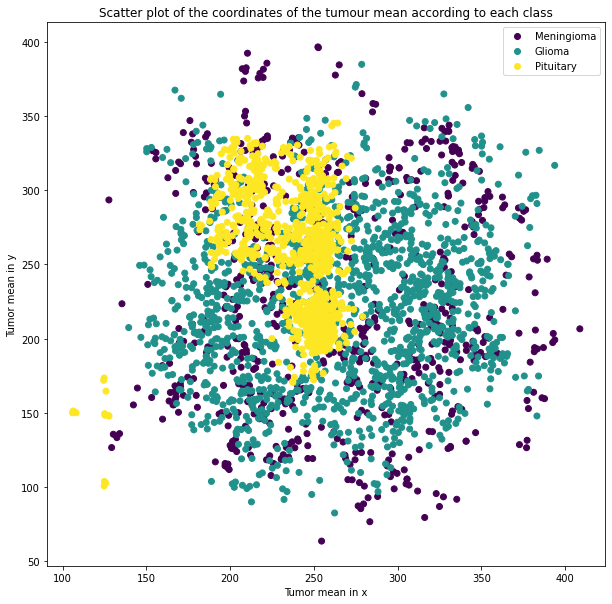

In [24]:
array = np.asarray(list_coord_class)
plt.figure(figsize=(10,10))
plt.title('Scatter plot of the coordinates of the tumour mean according to each class')
scatter  = plt.scatter(array[:,0], array[:,1], c= array[:,2])
plt.xlabel("Tumor mean in x")
plt.ylabel("Tumor mean in y")
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()